In [1]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join('..', 'src')))
from funkwpap import *
import sympy as sp, pandas as pd, numpy as np, tqdm, time, sys, matplotlib.pyplot as plt, tqdm
from statistics import mean
from scipy.optimize import fsolve
from random import random


In [2]:
x = sp.symbols('x')
cap = 200 # total emission cap
Regulator20 = Regulator("Regulator20", permit_price = 2.4079, emission_cap = cap)
sector1 = Sector('cement', price_demand_function= 900 - 0.3*x, free_emission_multiplier= 0, regulator= Regulator20)
sector2 = Sector('steel', price_demand_function=150 - 0.1*x, free_emission_multiplier= 0, regulator= Regulator20)

country3 = Country('GR', size= 0.1, regulator= Regulator20)

# Create Firms using objects
firm1 = Firm('firm1', 1, 1, x*0, 10*x+ 2*x**2 + 0.1*x**3 , 0, 0, 0, regulator= Regulator20)
firm2 = Firm('firm2', 1, 2, x*0, 11*x+ 3*x**2 + 0.2*x**3, 0, 0, 0, regulator= Regulator20)
firm3 = Firm('firm3', 1, 3, x*0, 5*x+ 4*x**2 + 3*x**3 , 0, 0, 0, regulator= Regulator20)
firm4 = Firm('firm4', 2, 1, x*0, 7*x+ 5*x**2 + 6*x**3 , 0, 0, 0, regulator= Regulator20)
firm5 = Firm('firm5', 2, 2, x*0, 1*x+ 6*x**2 + 7*x**3 , 0, 0, 0, regulator= Regulator20)
firm6 = Firm('firm6', 2, 3, x*0, 2*x+ 7*x**2 + 8*x**3 , 0, 0, 0, regulator= Regulator20)

In [3]:
Regulator20.BAU_calculator()

Set parameter Username
Academic license - for non-commercial use only - expires 2025-08-14


In [4]:
Regulator20.emission_cap = Regulator20.BAU_emissions * 0.8

frees = np.linspace(0, 1, 100)

profits1 = []
profits2 = []
abatements1 = []
abatements2 = []
permits1 = []
permits2 = []
trades1 = []
trades2 = []
revenews1 = []
revenews2 = []
permit_price = []
outputs1 = []
outputs2 = []
emissions1 = []
emissions2 = []


for free in tqdm.tqdm(frees):
    
    
    sector1.free_emission_multiplier = free
    Regulator20.optimization_with_least_squares()
    print(f"{free}: {Regulator20.equilibrium_tester(output = True)}")

    for firm in Regulator20.firm_registry.values():
        firm.calculate_profit_components()

    profits1.append(mean( float(i.profit) for i in sector1.firms))
    profits2.append(mean( float(i.profit) for i in sector2.firms))
    abatements1.append(mean( float(i.abatement) for i in sector1.firms))
    abatements2.append(mean( float(i.abatement) for i in sector2.firms))
    permits1.append(mean( float(i.permits_used) for i in sector1.firms))
    permits2.append(mean( float(i.permits_used) for i in sector2.firms))
    trades1.append(mean( float(i.permits_costs) for i in sector1.firms))
    trades2.append(mean( float(i.permits_costs) for i in sector2.firms))
    revenews1.append( mean(float(i.sales) for i in sector1.firms))
    revenews2.append(mean( float(i.sales) for i in sector2.firms))
    permit_price.append(Regulator20.permit_price)
    outputs1.append(mean(float(i.actual_output) for i in sector1.firms))
    outputs2.append(mean(float(i.actual_output) for i in sector2.firms))
    emissions1.append(mean(float(i.emission) for i in sector1.firms))
    emissions2.append(mean(float(i.emission) for i in sector2.firms))    

  0%|          | 0/100 [00:00<?, ?it/s]

Optimal solution found


  1%|          | 1/100 [00:07<12:08,  7.35s/it]

Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +5.09e-6 ✔️ |  +7.93e-5 ✔️ |   -9.0831 ✔️ |   -9.6831 ✔️ |   +5.4499 ✔️ | 5/5
0.0: (True, 7.93110705217259e-5)


  2%|▏         | 2/100 [00:13<11:13,  6.87s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +1.65e-5 ✔️ |  +7.87e-5 ✔️ |   -9.0938 ✔️ |   -9.6938 ✔️ |   +5.4563 ✔️ | 5/5
0.010101010101010102: (True, 7.87091509835136e-5)


  3%|▎         | 3/100 [00:20<10:39,  6.60s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +6.83e-6 ✔️ |  +7.89e-5 ✔️ |   -9.1045 ✔️ |   -9.7045 ✔️ |   +5.4627 ✔️ | 5/5
0.020202020202020204: (True, 7.89163115939573e-5)


  4%|▍         | 4/100 [00:26<10:21,  6.48s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +8.73e-6 ✔️ |  +7.96e-5 ✔️ |   -9.1152 ✔️ |   -9.7152 ✔️ |   +5.4691 ✔️ | 5/5
0.030303030303030304: (True, 7.95519872269779e-5)


  5%|▌         | 5/100 [00:32<10:13,  6.46s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +7.77e-7 ✔️ |  +8.05e-5 ✔️ |   -9.1260 ✔️ |   -9.7260 ✔️ |   +5.4756 ✔️ | 5/5
0.04040404040404041: (True, 8.05205937197684e-5)
Optimal solution found


  6%|▌         | 6/100 [00:39<10:13,  6.52s/it]

Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +7.63e-7 ✔️ |  +8.05e-5 ✔️ |   -9.1369 ✔️ |   -9.7369 ✔️ |   +5.4821 ✔️ | 5/5
0.05050505050505051: (True, 8.05141810999999e-5)


  7%|▋         | 7/100 [00:45<10:02,  6.48s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +1.08e-6 ✔️ |  +8.05e-5 ✔️ |   -9.1477 ✔️ |   -9.7477 ✔️ |   +5.4886 ✔️ | 5/5
0.06060606060606061: (True, 8.05094646949556e-5)


  8%|▊         | 8/100 [00:52<09:57,  6.49s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +1.67e-6 ✔️ |  +8.05e-5 ✔️ |   -9.1586 ✔️ |   -9.7586 ✔️ |   +5.4952 ✔️ | 5/5
0.07070707070707072: (True, 8.05043217440016e-5)


  9%|▉         | 9/100 [00:58<09:46,  6.44s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +1.24e-6 ✔️ |  +8.05e-5 ✔️ |   -9.1696 ✔️ |   -9.7696 ✔️ |   +5.5018 ✔️ | 5/5
0.08080808080808081: (True, 8.04972224486278e-5)


 10%|█         | 10/100 [01:05<09:37,  6.42s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +1.06e-6 ✔️ |  +8.05e-5 ✔️ |   -9.1806 ✔️ |   -9.7806 ✔️ |   +5.5084 ✔️ | 5/5
0.09090909090909091: (True, 8.04914192897854e-5)
Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +6.91e-7 ✔️ |  +8.05e-5 ✔️ |   -9.1916 ✔️ |   -9.7916 ✔️ |   +5.5150 ✔️ | 5/5
0.10101010101010102: (True, 8.04841949886281e-5)


 12%|█▏        | 12/100 [01:17<09:21,  6.38s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +1.98e-6 ✔️ |  +8.05e-5 ✔️ |   -9.2027 ✔️ |   -9.8027 ✔️ |   +5.5216 ✔️ | 5/5
0.11111111111111112: (True, 8.04786336914276e-5)


 13%|█▎        | 13/100 [01:23<09:08,  6.30s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +7.31e-6 ✔️ |  +8.77e-5 ✔️ |   -9.2139 ✔️ |   -9.8139 ✔️ |   +5.5283 ✔️ | 5/5
0.12121212121212122: (True, 8.76827179325801e-5)


 14%|█▍        | 14/100 [01:30<08:58,  6.26s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +7.61e-6 ✔️ |  +8.80e-5 ✔️ |   -9.2250 ✔️ |   -9.8250 ✔️ |   +5.5350 ✔️ | 5/5
0.13131313131313133: (True, 8.79892874650068e-5)


 15%|█▌        | 15/100 [01:36<08:54,  6.28s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +6.33e-7 ✔️ |  +8.05e-5 ✔️ |   -9.2362 ✔️ |   -9.8362 ✔️ |   +5.5417 ✔️ | 5/5
0.14141414141414144: (True, 8.04631070820960e-5)


 16%|█▌        | 16/100 [01:42<08:50,  6.31s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +6.19e-7 ✔️ |  +8.05e-5 ✔️ |   -9.2475 ✔️ |   -9.8475 ✔️ |   +5.5485 ✔️ | 5/5
0.15151515151515152: (True, 8.04577764625947e-5)


 17%|█▋        | 17/100 [01:49<08:43,  6.31s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +6.04e-7 ✔️ |  +8.05e-5 ✔️ |   -9.2588 ✔️ |   -9.8588 ✔️ |   +5.5553 ✔️ | 5/5
0.16161616161616163: (True, 8.04529351370320e-5)


 18%|█▊        | 18/100 [01:55<08:37,  6.31s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +1.09e-6 ✔️ |  +8.04e-5 ✔️ |   -9.2701 ✔️ |   -9.8701 ✔️ |   +5.5621 ✔️ | 5/5
0.17171717171717174: (True, 8.04490266546054e-5)


 19%|█▉        | 19/100 [02:01<08:32,  6.32s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +5.74e-7 ✔️ |  +8.04e-5 ✔️ |   -9.2815 ✔️ |   -9.8815 ✔️ |   +5.5689 ✔️ | 5/5
0.18181818181818182: (True, 8.04437228225652e-5)


 20%|██        | 20/100 [02:08<08:29,  6.37s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +2.07e-7 ✔️ |  +8.04e-5 ✔️ |   -9.2930 ✔️ |   -9.8930 ✔️ |   +5.5758 ✔️ | 5/5
0.19191919191919193: (True, 8.03897796401998e-5)


 21%|██        | 21/100 [02:14<08:24,  6.39s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +1.41e-6 ✔️ |  +8.04e-5 ✔️ |   -9.3045 ✔️ |   -9.9045 ✔️ |   +5.5827 ✔️ | 5/5
0.20202020202020204: (True, 8.04360726576192e-5)


 22%|██▏       | 22/100 [02:20<08:14,  6.34s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +7.91e-6 ✔️ |  +8.04e-5 ✔️ |   -9.3160 ✔️ |   -9.9160 ✔️ |   +5.5896 ✔️ | 5/5
0.21212121212121213: (True, 8.04490229100452e-5)


 23%|██▎       | 23/100 [02:27<08:04,  6.29s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +5.21e-7 ✔️ |  +8.04e-5 ✔️ |   -9.3276 ✔️ |   -9.9276 ✔️ |   +5.5965 ✔️ | 5/5
0.22222222222222224: (True, 8.04269079779374e-5)


 24%|██▍       | 24/100 [02:33<07:55,  6.26s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +9.88e-7 ✔️ |  +8.04e-5 ✔️ |   -9.3392 ✔️ |   -9.9392 ✔️ |   +5.6035 ✔️ | 5/5
0.23232323232323235: (True, 8.04236520295376e-5)


 25%|██▌       | 25/100 [02:39<07:46,  6.22s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +8.72e-6 ✔️ |  +8.04e-5 ✔️ |   -9.3508 ✔️ |   -9.9508 ✔️ |   +5.6105 ✔️ | 5/5
0.24242424242424243: (True, 8.04356840262699e-5)


 26%|██▌       | 26/100 [02:45<07:38,  6.20s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +4.73e-7 ✔️ |  +8.04e-5 ✔️ |   -9.3626 ✔️ |   -9.9626 ✔️ |   +5.6175 ✔️ | 5/5
0.25252525252525254: (True, 8.04157633425007e-5)


 27%|██▋       | 27/100 [02:51<07:32,  6.19s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +1.31e-6 ✔️ |  +8.04e-5 ✔️ |   -9.3743 ✔️ |   -9.9743 ✔️ |   +5.6246 ✔️ | 5/5
0.26262626262626265: (True, 8.04128770255375e-5)


 28%|██▊       | 28/100 [02:57<07:25,  6.19s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +2.41e-7 ✔️ |  +8.04e-5 ✔️ |   -9.3861 ✔️ |   -9.9861 ✔️ |   +5.6317 ✔️ | 5/5
0.27272727272727276: (True, 8.03781568521345e-5)


 29%|██▉       | 29/100 [03:04<07:21,  6.22s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +8.75e-6 ✔️ |  +8.04e-5 ✔️ |   -9.3980 ✔️ |   -9.9980 ✔️ |   +5.6388 ✔️ | 5/5
0.2828282828282829: (True, 8.03774087287934e-5)


 30%|███       | 30/100 [03:10<07:18,  6.26s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +6.88e-7 ✔️ |  +7.98e-5 ✔️ |   -9.4099 ✔️ |  -10.0099 ✔️ |   +5.6459 ✔️ | 5/5
0.29292929292929293: (True, 7.97506544927273e-5)


 31%|███       | 31/100 [03:16<07:12,  6.27s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +1.07e-5 ✔️ |  +8.12e-5 ✔️ |   -9.4219 ✔️ |  -10.0219 ✔️ |   +5.6531 ✔️ | 5/5
0.30303030303030304: (True, 8.12345449148211e-5)


 32%|███▏      | 32/100 [03:23<07:06,  6.27s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +1.68e-5 ✔️ |  +8.04e-5 ✔️ |   -9.4339 ✔️ |  -10.0339 ✔️ |   +5.6603 ✔️ | 5/5
0.31313131313131315: (True, 8.03757045702014e-5)


 33%|███▎      | 33/100 [03:29<06:59,  6.26s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +1.61e-5 ✔️ |  +8.04e-5 ✔️ |   -9.4459 ✔️ |  -10.0459 ✔️ |   +5.6675 ✔️ | 5/5
0.32323232323232326: (True, 8.03754195430884e-5)


 34%|███▍      | 34/100 [03:35<06:55,  6.29s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +7.59e-6 ✔️ |  +8.04e-5 ✔️ |   -9.4580 ✔️ |  -10.0580 ✔️ |   +5.6748 ✔️ | 5/5
0.33333333333333337: (True, 8.03804630038485e-5)


 35%|███▌      | 35/100 [03:41<06:47,  6.27s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +5.89e-6 ✔️ |  +8.04e-5 ✔️ |   -9.4702 ✔️ |  -10.0702 ✔️ |   +5.6821 ✔️ | 5/5
0.3434343434343435: (True, 8.04430628136288e-5)


 36%|███▌      | 36/100 [03:48<06:40,  6.26s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +4.39e-6 ✔️ |  +7.97e-5 ✔️ |   -9.4824 ✔️ |  -10.0824 ✔️ |   +5.6894 ✔️ | 5/5
0.3535353535353536: (True, 7.97307704729633e-5)


 37%|███▋      | 37/100 [03:54<06:28,  6.17s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +1.43e-5 ✔️ |  +7.97e-5 ✔️ |   -9.4946 ✔️ |  -10.0946 ✔️ |   +5.6968 ✔️ | 5/5
0.36363636363636365: (True, 7.97385283917151e-5)


 38%|███▊      | 38/100 [04:00<06:23,  6.19s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +1.28e-5 ✔️ |  +8.04e-5 ✔️ |   -9.5069 ✔️ |  -10.1069 ✔️ |   +5.7042 ✔️ | 5/5
0.37373737373737376: (True, 8.04357355619345e-5)


 39%|███▉      | 39/100 [04:06<06:16,  6.17s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +2.35e-5 ✔️ |  +8.00e-5 ✔️ |   -9.5193 ✔️ |  -10.1193 ✔️ |   +5.7116 ✔️ | 5/5
0.38383838383838387: (True, 7.99673924518629e-5)


 40%|████      | 40/100 [04:12<06:09,  6.16s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +1.47e-5 ✔️ |  +8.90e-5 ✔️ |   -9.5317 ✔️ |  -10.1317 ✔️ |   +5.7190 ✔️ | 5/5
0.393939393939394: (True, 8.90261415094074e-5)


 41%|████      | 41/100 [04:18<06:03,  6.16s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +6.43e-7 ✔️ |  +8.04e-5 ✔️ |   -9.5442 ✔️ |  -10.1442 ✔️ |   +5.7265 ✔️ | 5/5
0.4040404040404041: (True, 8.03915077369766e-5)


 42%|████▏     | 42/100 [04:24<05:54,  6.12s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +6.40e-7 ✔️ |  +8.04e-5 ✔️ |   -9.5567 ✔️ |  -10.1567 ✔️ |   +5.7340 ✔️ | 5/5
0.4141414141414142: (True, 8.03886048075242e-5)


 43%|████▎     | 43/100 [04:30<05:47,  6.09s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +6.37e-7 ✔️ |  +8.04e-5 ✔️ |   -9.5692 ✔️ |  -10.1692 ✔️ |   +5.7415 ✔️ | 5/5
0.42424242424242425: (True, 8.03871414447599e-5)


 44%|████▍     | 44/100 [04:36<05:40,  6.08s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +1.69e-5 ✔️ |  +8.04e-5 ✔️ |   -9.5818 ✔️ |  -10.1818 ✔️ |   +5.7491 ✔️ | 5/5
0.43434343434343436: (True, 8.03851926178822e-5)


 45%|████▌     | 45/100 [04:42<05:32,  6.05s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +1.61e-5 ✔️ |  +8.04e-5 ✔️ |   -9.5945 ✔️ |  -10.1945 ✔️ |   +5.7567 ✔️ | 5/5
0.4444444444444445: (True, 8.03834045797203e-5)


 46%|████▌     | 46/100 [04:48<05:25,  6.03s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +1.53e-5 ✔️ |  +8.04e-5 ✔️ |   -9.6072 ✔️ |  -10.2072 ✔️ |   +5.7643 ✔️ | 5/5
0.4545454545454546: (True, 8.03816984742411e-5)


 47%|████▋     | 47/100 [04:54<05:18,  6.01s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +1.68e-5 ✔️ |  +8.54e-5 ✔️ |   -9.6200 ✔️ |  -10.2200 ✔️ |   +5.7720 ✔️ | 5/5
0.4646464646464647: (True, 8.53765868740197e-5)


 48%|████▊     | 48/100 [05:00<05:11,  5.99s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +1.74e-5 ✔️ |  +8.04e-5 ✔️ |   -9.6329 ✔️ |  -10.2329 ✔️ |   +5.7797 ✔️ | 5/5
0.4747474747474748: (True, 8.03791980104052e-5)


 49%|████▉     | 49/100 [05:06<05:04,  5.97s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +6.14e-7 ✔️ |  +8.04e-5 ✔️ |   -9.6457 ✔️ |  -10.2457 ✔️ |   +5.7874 ✔️ | 5/5
0.48484848484848486: (True, 8.03804630677973e-5)


 50%|█████     | 50/100 [05:12<04:58,  5.98s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +1.62e-5 ✔️ |  +8.04e-5 ✔️ |   -9.6587 ✔️ |  -10.2587 ✔️ |   +5.7952 ✔️ | 5/5
0.494949494949495: (True, 8.03776538944589e-5)


 51%|█████     | 51/100 [05:18<04:52,  5.96s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +2.09e-5 ✔️ |  +8.04e-5 ✔️ |   -9.6717 ✔️ |  -10.2717 ✔️ |   +5.8030 ✔️ | 5/5
0.5050505050505051: (True, 8.03767975057212e-5)


 52%|█████▏    | 52/100 [05:24<04:46,  5.96s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +1.45e-5 ✔️ |  +8.04e-5 ✔️ |   -9.6848 ✔️ |  -10.2848 ✔️ |   +5.8109 ✔️ | 5/5
0.5151515151515152: (True, 8.03760035310574e-5)


 53%|█████▎    | 53/100 [05:30<04:40,  5.97s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +2.09e-5 ✔️ |  +8.05e-5 ✔️ |   -9.6979 ✔️ |  -10.2979 ✔️ |   +5.8187 ✔️ | 5/5
0.5252525252525253: (True, 8.04619478174118e-5)


 54%|█████▍    | 54/100 [05:36<04:34,  5.97s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +2.07e-5 ✔️ |  +8.05e-5 ✔️ |   -9.7110 ✔️ |  -10.3110 ✔️ |   +5.8266 ✔️ | 5/5
0.5353535353535354: (True, 8.04536793239663e-5)


 55%|█████▌    | 55/100 [05:42<04:28,  5.97s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +2.33e-5 ✔️ |  +1.04e-4 ✔️ |   -9.7243 ✔️ |  -10.3243 ✔️ |   +5.8346 ✔️ | 5/5
0.5454545454545455: (True, 0.000103689170245502)


 56%|█████▌    | 56/100 [05:48<04:22,  5.96s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +2.40e-5 ✔️ |  +1.04e-4 ✔️ |   -9.7376 ✔️ |  -10.3376 ✔️ |   +5.8425 ✔️ | 5/5
0.5555555555555556: (True, 0.000104364446613658)


 57%|█████▋    | 57/100 [05:54<04:17,  5.98s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +2.17e-5 ✔️ |  +1.02e-4 ✔️ |   -9.7509 ✔️ |  -10.3509 ✔️ |   +5.8505 ✔️ | 5/5
0.5656565656565657: (True, 0.000102068145814371)


 58%|█████▊    | 58/100 [06:00<04:11,  6.00s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +2.10e-5 ✔️ |  +1.01e-4 ✔️ |   -9.7643 ✔️ |  -10.3643 ✔️ |   +5.8586 ✔️ | 5/5
0.5757575757575758: (True, 0.000101353335629994)


 59%|█████▉    | 59/100 [06:06<04:07,  6.04s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +1.98e-5 ✔️ |  +1.00e-4 ✔️ |   -9.7778 ✔️ |  -10.3778 ✔️ |   +5.8667 ✔️ | 5/5
0.5858585858585859: (True, 0.000100164768817024)


 60%|██████    | 60/100 [06:12<04:02,  6.07s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +1.91e-5 ✔️ |  +9.93e-5 ✔️ |   -9.7913 ✔️ |  -10.3913 ✔️ |   +5.8748 ✔️ | 5/5
0.595959595959596: (True, 9.93342331767622e-5)


 61%|██████    | 61/100 [06:18<03:56,  6.07s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +1.88e-5 ✔️ |  +9.85e-5 ✔️ |   -9.8049 ✔️ |  -10.4049 ✔️ |   +5.8829 ✔️ | 5/5
0.6060606060606061: (True, 9.85264999897595e-5)


 62%|██████▏   | 62/100 [06:24<03:49,  6.05s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +1.85e-5 ✔️ |  +9.78e-5 ✔️ |   -9.8185 ✔️ |  -10.4185 ✔️ |   +5.8911 ✔️ | 5/5
0.6161616161616162: (True, 9.78165108236340e-5)


 63%|██████▎   | 63/100 [06:30<03:43,  6.03s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +1.81e-5 ✔️ |  +9.73e-5 ✔️ |   -9.8322 ✔️ |  -10.4322 ✔️ |   +5.8993 ✔️ | 5/5
0.6262626262626263: (True, 9.72760313828758e-5)


 64%|██████▍   | 64/100 [06:36<03:36,  6.02s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +1.79e-5 ✔️ |  +9.62e-5 ✔️ |   -9.8460 ✔️ |  -10.4460 ✔️ |   +5.9076 ✔️ | 5/5
0.6363636363636365: (True, 9.62498877328244e-5)


 65%|██████▌   | 65/100 [06:42<03:30,  6.02s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +1.76e-5 ✔️ |  +9.57e-5 ✔️ |   -9.8598 ✔️ |  -10.4598 ✔️ |   +5.9159 ✔️ | 5/5
0.6464646464646465: (True, 9.57350682782021e-5)


 66%|██████▌   | 66/100 [06:48<03:24,  6.02s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +1.74e-5 ✔️ |  +9.47e-5 ✔️ |   -9.8737 ✔️ |  -10.4737 ✔️ |   +5.9242 ✔️ | 5/5
0.6565656565656566: (True, 9.47324567377450e-5)


 67%|██████▋   | 67/100 [06:54<03:19,  6.05s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +1.70e-5 ✔️ |  +9.43e-5 ✔️ |   -9.8876 ✔️ |  -10.4876 ✔️ |   +5.9326 ✔️ | 5/5
0.6666666666666667: (True, 9.42938822134920e-5)


 68%|██████▊   | 68/100 [07:00<03:12,  6.03s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +1.69e-5 ✔️ |  +9.33e-5 ✔️ |   -9.9017 ✔️ |  -10.5017 ✔️ |   +5.9410 ✔️ | 5/5
0.6767676767676768: (True, 9.33454811971046e-5)
Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +1.66e-5 ✔️ |  +9.27e-5 ✔️ |   -9.9157 ✔️ |  -10.5157 ✔️ |   +5.9494 ✔️ | 5/5
0.686868686868687: (True, 9.26676317476449e-5)


 70%|███████   | 70/100 [07:12<02:59,  5.99s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +1.63e-5 ✔️ |  +9.20e-5 ✔️ |   -9.9299 ✔️ |  -10.5299 ✔️ |   +5.9579 ✔️ | 5/5
0.696969696969697: (True, 9.20132872863633e-5)


 71%|███████   | 71/100 [07:18<02:51,  5.90s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +1.61e-5 ✔️ |  +9.14e-5 ✔️ |   -9.9441 ✔️ |  -10.5441 ✔️ |   +5.9665 ✔️ | 5/5
0.7070707070707072: (True, 9.13873818504385e-5)


 72%|███████▏  | 72/100 [07:24<02:44,  5.87s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +1.58e-5 ✔️ |  +9.07e-5 ✔️ |   -9.9584 ✔️ |  -10.5584 ✔️ |   +5.9750 ✔️ | 5/5
0.7171717171717172: (True, 9.07457314269777e-5)


 73%|███████▎  | 73/100 [07:30<02:37,  5.84s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +1.54e-5 ✔️ |  +9.04e-5 ✔️ |   -9.9727 ✔️ |  -10.5727 ✔️ |   +5.9836 ✔️ | 5/5
0.7272727272727273: (True, 9.03913548810920e-5)


 74%|███████▍  | 74/100 [07:36<02:34,  5.93s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +1.52e-5 ✔️ |  +8.96e-5 ✔️ |   -9.9871 ✔️ |  -10.5871 ✔️ |   +5.9923 ✔️ | 5/5
0.7373737373737375: (True, 8.96132397727456e-5)


 75%|███████▌  | 75/100 [07:42<02:29,  5.97s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +1.48e-5 ✔️ |  +8.92e-5 ✔️ |  -10.0016 ✔️ |  -10.6016 ✔️ |   +6.0009 ✔️ | 5/5
0.7474747474747475: (True, 8.92265014371674e-5)


 76%|███████▌  | 76/100 [07:48<02:23,  5.99s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +1.46e-5 ✔️ |  +8.87e-5 ✔️ |  -10.0161 ✔️ |  -10.6161 ✔️ |   +6.0097 ✔️ | 5/5
0.7575757575757577: (True, 8.86633748820032e-5)


 77%|███████▋  | 77/100 [07:54<02:17,  5.99s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +7.65e-6 ✔️ |  +8.80e-5 ✔️ |  -10.0307 ✔️ |  -10.6307 ✔️ |   +6.0184 ✔️ | 5/5
0.7676767676767677: (True, 8.80297052674450e-5)


 78%|███████▊  | 78/100 [08:00<02:11,  5.97s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +1.42e-5 ✔️ |  +8.74e-5 ✔️ |  -10.0454 ✔️ |  -10.6454 ✔️ |   +6.0272 ✔️ | 5/5
0.7777777777777778: (True, 8.74137679929277e-5)


 79%|███████▉  | 79/100 [08:06<02:04,  5.95s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +1.39e-5 ✔️ |  +8.69e-5 ✔️ |  -10.0601 ✔️ |  -10.6601 ✔️ |   +6.0361 ✔️ | 5/5
0.787878787878788: (True, 8.69119109552230e-5)


 80%|████████  | 80/100 [08:12<01:58,  5.94s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +1.35e-5 ✔️ |  +8.66e-5 ✔️ |  -10.0750 ✔️ |  -10.6750 ✔️ |   +6.0450 ✔️ | 5/5
0.797979797979798: (True, 8.66224752513745e-5)


 81%|████████  | 81/100 [08:17<01:52,  5.92s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +5.93e-6 ✔️ |  +8.63e-5 ✔️ |  -10.0898 ✔️ |  -10.6898 ✔️ |   +6.0539 ✔️ | 5/5
0.8080808080808082: (True, 8.63030468849502e-5)


 82%|████████▏ | 82/100 [08:23<01:46,  5.91s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +1.31e-5 ✔️ |  +8.56e-5 ✔️ |  -10.1048 ✔️ |  -10.7048 ✔️ |   +6.0629 ✔️ | 5/5
0.8181818181818182: (True, 8.55993648372078e-5)


 83%|████████▎ | 83/100 [08:29<01:40,  5.89s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +1.28e-5 ✔️ |  +8.52e-5 ✔️ |  -10.1198 ✔️ |  -10.7198 ✔️ |   +6.0719 ✔️ | 5/5
0.8282828282828284: (True, 8.51552013259038e-5)


 84%|████████▍ | 84/100 [08:35<01:33,  5.86s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +1.26e-5 ✔️ |  +8.47e-5 ✔️ |  -10.1349 ✔️ |  -10.7349 ✔️ |   +6.0809 ✔️ | 5/5
0.8383838383838385: (True, 8.47305194326964e-5)


 85%|████████▌ | 85/100 [08:41<01:27,  5.86s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +1.22e-5 ✔️ |  +8.45e-5 ✔️ |  -10.1501 ✔️ |  -10.7501 ✔️ |   +6.0900 ✔️ | 5/5
0.8484848484848485: (True, 8.44653208247337e-5)


 86%|████████▌ | 86/100 [08:47<01:22,  5.90s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +3.74e-6 ✔️ |  +8.41e-5 ✔️ |  -10.1653 ✔️ |  -10.7653 ✔️ |   +6.0992 ✔️ | 5/5
0.8585858585858587: (True, 8.41112724501158e-5)


 87%|████████▋ | 87/100 [08:53<01:17,  5.93s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +3.39e-6 ✔️ |  +8.38e-5 ✔️ |  -10.1806 ✔️ |  -10.7806 ✔️ |   +6.1084 ✔️ | 5/5
0.8686868686868687: (True, 8.37649497427151e-5)


 88%|████████▊ | 88/100 [08:59<01:11,  5.93s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +2.68e-6 ✔️ |  +8.12e-5 ✔️ |  -10.1960 ✔️ |  -10.7960 ✔️ |   +6.1176 ✔️ | 5/5
0.8787878787878789: (True, 8.12192426877800e-5)


 89%|████████▉ | 89/100 [09:05<01:05,  5.91s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +2.86e-6 ✔️ |  +8.23e-5 ✔️ |  -10.2115 ✔️ |  -10.8115 ✔️ |   +6.1269 ✔️ | 5/5
0.888888888888889: (True, 8.23150569644326e-5)


 90%|█████████ | 90/100 [09:11<00:59,  5.90s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +1.94e-6 ✔️ |  +8.08e-5 ✔️ |  -10.2270 ✔️ |  -10.8270 ✔️ |   +6.1362 ✔️ | 5/5
0.8989898989898991: (True, 8.07754291543006e-5)


 91%|█████████ | 91/100 [09:16<00:52,  5.87s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +2.13e-6 ✔️ |  +8.15e-5 ✔️ |  -10.2426 ✔️ |  -10.8426 ✔️ |   +6.1456 ✔️ | 5/5
0.9090909090909092: (True, 8.15375919174244e-5)


 92%|█████████▏| 92/100 [09:22<00:46,  5.85s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +1.77e-6 ✔️ |  +8.12e-5 ✔️ |  -10.2583 ✔️ |  -10.8583 ✔️ |   +6.1550 ✔️ | 5/5
0.9191919191919192: (True, 8.11973154668522e-5)


 93%|█████████▎| 93/100 [09:28<00:40,  5.83s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +1.01e-6 ✔️ |  +8.10e-5 ✔️ |  -10.2741 ✔️ |  -10.8741 ✔️ |   +6.1645 ✔️ | 5/5
0.9292929292929294: (True, 8.09557745711231e-5)


 94%|█████████▍| 94/100 [09:34<00:34,  5.79s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +1.13e-6 ✔️ |  +8.08e-5 ✔️ |  -10.2899 ✔️ |  -10.8899 ✔️ |   +6.1740 ✔️ | 5/5
0.9393939393939394: (True, 8.08347700811396e-5)


 95%|█████████▌| 95/100 [09:39<00:28,  5.78s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +1.50e-6 ✔️ |  +8.06e-5 ✔️ |  -10.3059 ✔️ |  -10.9059 ✔️ |   +6.1835 ✔️ | 5/5
0.9494949494949496: (True, 8.06190743389834e-5)


 96%|█████████▌| 96/100 [09:45<00:23,  5.79s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +3.70e-6 ✔️ |  +8.09e-5 ✔️ |  -10.3218 ✔️ |  -10.9218 ✔️ |   +6.1931 ✔️ | 5/5
0.9595959595959597: (True, 8.09026083459230e-5)


 97%|█████████▋| 97/100 [09:51<00:17,  5.77s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +4.26e-6 ✔️ |  +8.04e-5 ✔️ |  -10.3379 ✔️ |  -10.9379 ✔️ |   +6.2028 ✔️ | 5/5
0.9696969696969697: (True, 8.04034116299590e-5)


 98%|█████████▊| 98/100 [09:57<00:11,  5.76s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +5.20e-6 ✔️ |  +8.05e-5 ✔️ |  -10.3541 ✔️ |  -10.9541 ✔️ |   +6.2125 ✔️ | 5/5
0.9797979797979799: (True, 8.04941166450135e-5)


 99%|█████████▉| 99/100 [10:02<00:05,  5.75s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +3.21e-6 ✔️ |  +8.04e-5 ✔️ |  -10.3703 ✔️ |  -10.9703 ✔️ |   +6.2222 ✔️ | 5/5
0.98989898989899: (True, 8.03970402074583e-5)


100%|██████████| 100/100 [10:08<00:00,  6.09s/it]

Optimal solution found
Firm       | FOC 1        | FOC 2         | SOC 1         | SOC 2        | Hessian      | Status
-------------------------------------------------------------------------------------
Worst      |  +4.18e-5 ✔️ |  +3.98e-5 ✔️ |  -10.3866 ✔️ |  -10.9866 ✔️ |   +6.2320 ✔️ | 5/5
1.0: (True, 4.17831685552983e-5)


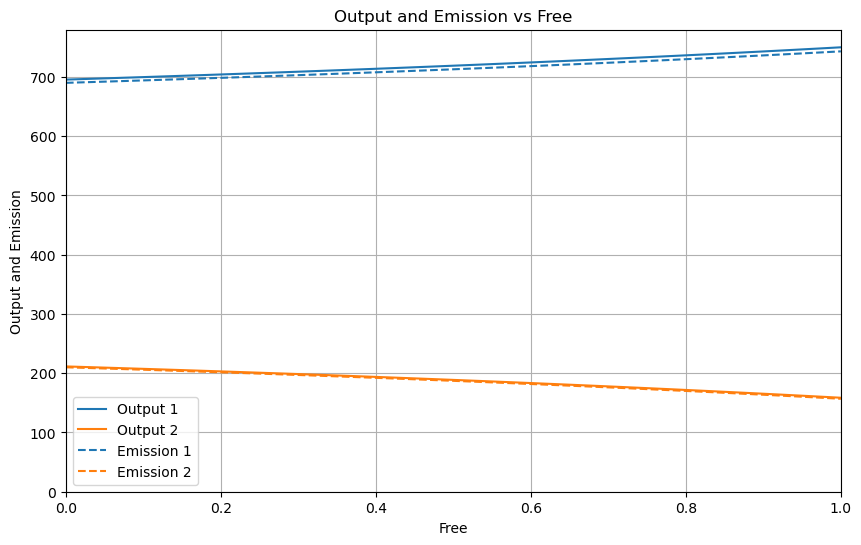

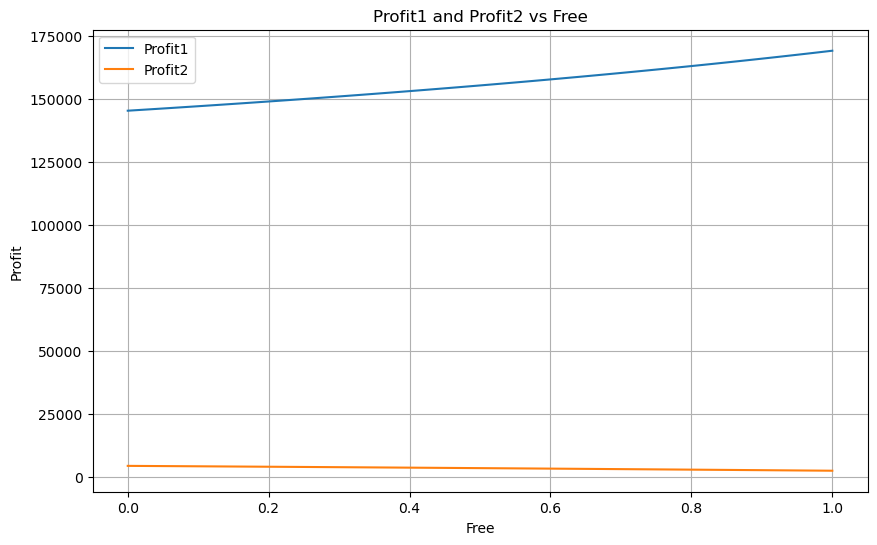

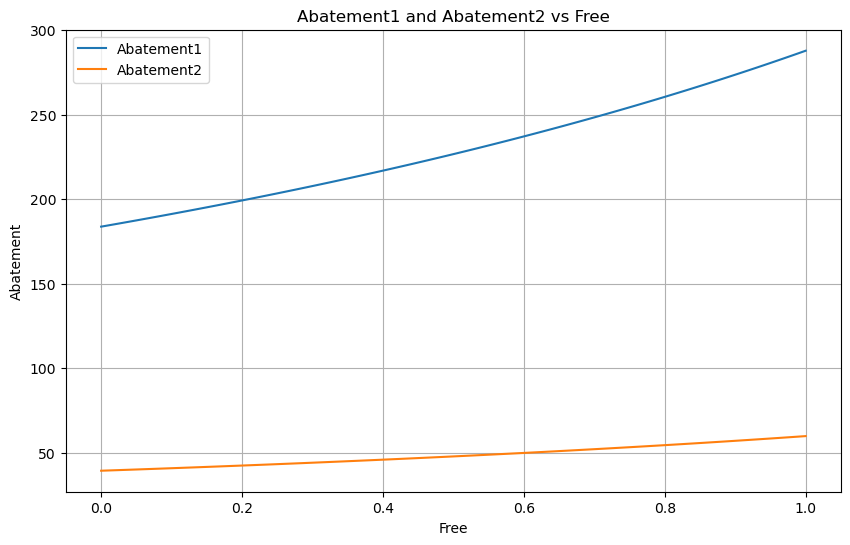

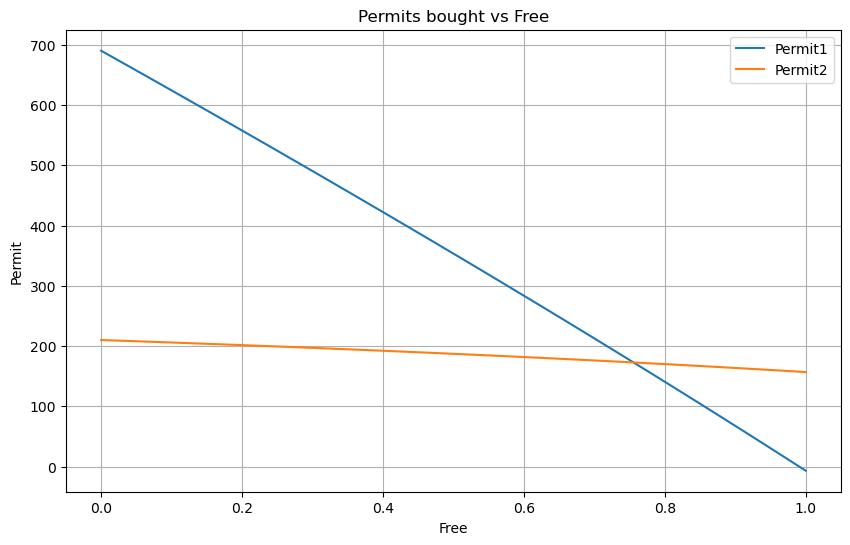

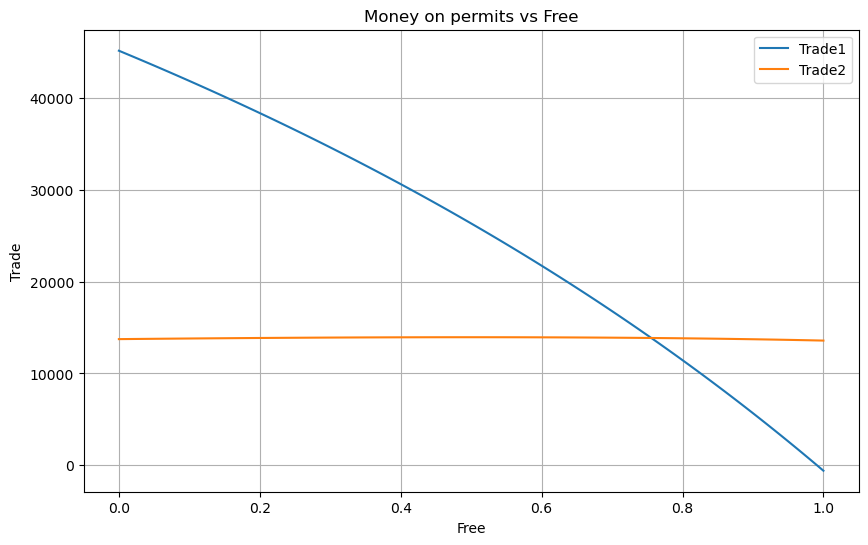

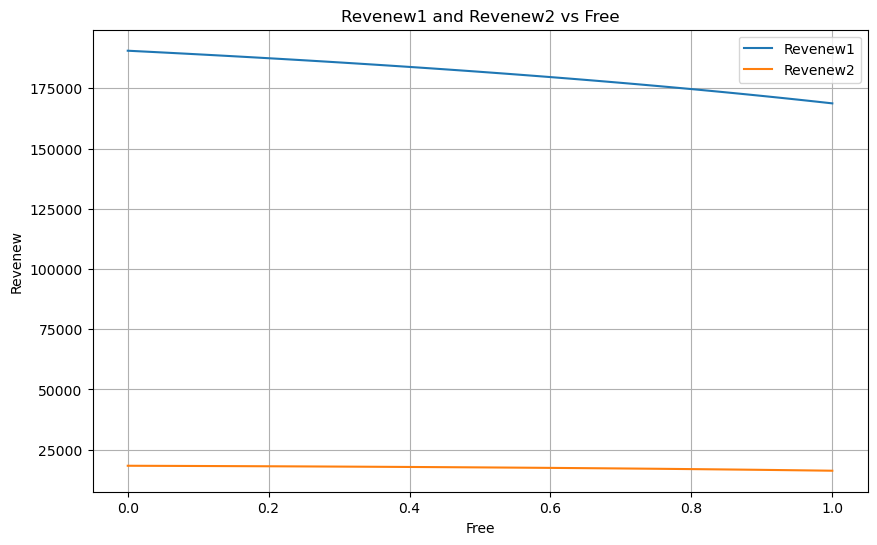

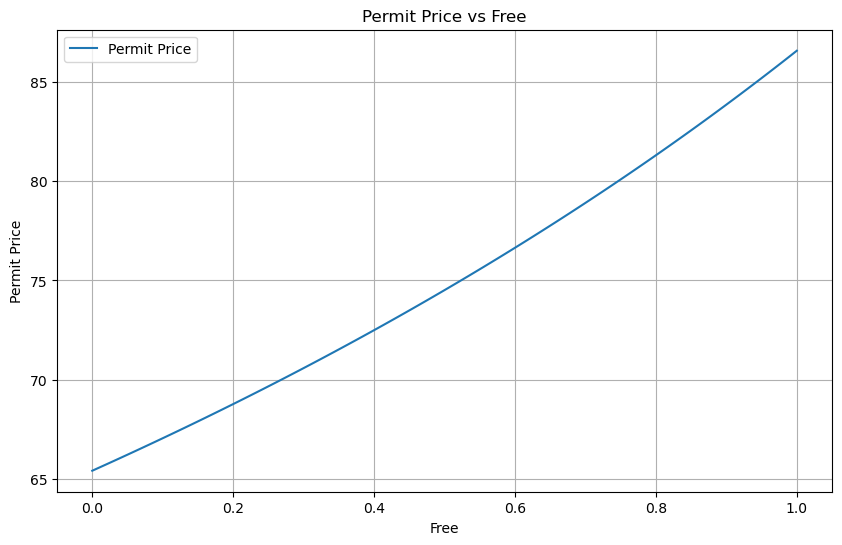

In [5]:
# Plot profit1 and profit2 with respect to frees
plt.figure(figsize=(10, 6))
plt.plot(frees, outputs1, label='Output 1', color = '#1f77b4')
plt.plot(frees, outputs2, label='Output 2', color = '#ff7f0e')
plt.plot(frees, emissions1, label='Emission 1', linestyle='--', color = '#1f77b4')
plt.plot(frees, emissions2, label='Emission 2', linestyle='--', color = '#ff7f0e')
plt.xlabel('Free')
plt.ylabel('Output and Emission')
plt.title('Output and Emission vs Free')
plt.legend()
plt.grid()
# Set the limits for the x and y axes
plt.xlim(0, 1)
plt.ylim(bottom=0)
plt.show()

# Plot profit1 and profit2 with respect to frees
plt.figure(figsize=(10, 6))
plt.plot(frees, profits1, label='Profit1')
plt.plot(frees, profits2, label='Profit2')
plt.xlabel('Free')
plt.ylabel('Profit')
plt.title('Profit1 and Profit2 vs Free')
plt.legend()
plt.grid()
plt.show()

# Plot abatement1 and abatement2 with respect to frees
plt.figure(figsize=(10, 6))
plt.plot(frees, abatements1, label='Abatement1')
plt.plot(frees, abatements2, label='Abatement2')
plt.xlabel('Free')
plt.ylabel('Abatement')
plt.title('Abatement1 and Abatement2 vs Free')
plt.legend()
plt.grid()
plt.show()

# Plot permit1 and permit2 with respect to frees
plt.figure(figsize=(10, 6))
plt.plot(frees, permits1, label='Permit1')
plt.plot(frees, permits2, label='Permit2')
plt.xlabel('Free')
plt.ylabel('Permit')
plt.title('Permits bought vs Free')
plt.legend()
plt.grid()
plt.show()

# Plot trade1 and trade2 with respect to frees
plt.figure(figsize=(10, 6))
plt.plot(frees, trades1, label='Trade1')
plt.plot(frees, trades2, label='Trade2')
plt.xlabel('Free')
plt.ylabel('Trade')
plt.title('Money on permits vs Free')
plt.legend()
plt.grid()
plt.show()

# Plot revenew1 and revenew2 with respect to frees
plt.figure(figsize=(10, 6))
plt.plot(frees, revenews1, label='Revenew1')
plt.plot(frees, revenews2, label='Revenew2')
plt.xlabel('Free')
plt.ylabel('Revenew')
plt.title('Revenew1 and Revenew2 vs Free')
plt.legend()
plt.grid()
plt.show()

# Plot permit_price with respect to frees
plt.figure(figsize=(10, 6))
plt.plot(frees, permit_price, label='Permit Price')
plt.xlabel('Free')
plt.ylabel('Permit Price')
plt.title('Permit Price vs Free')
plt.legend()
plt.grid()
plt.show()